# Notebook Configuration

## Warning

In [142]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [143]:
import matplotlib.pyplot as plt

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [144]:
###########################################
#not required in our case?
import tensorflow as tf
#from tensorflow import keras

## Random seed

In [145]:
############################################

# The random seed
random_seed = 42  # this was 0 in previous version. any specific reason?

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

## Loading the data

In [146]:
import pandas as pd

# Load the raw training data from github to avoid downloading the data
df_raw_train = pd.read_csv("https://raw.githubusercontent.com/phanindra-max/Machine-Learning-I/refs/heads/main/data/census.csv", header=0)
# Make a copy of df_raw_train
data_train = df_raw_train.copy(deep=True)

# Load the raw test data from github
df_raw_test = pd.read_csv("https://raw.githubusercontent.com/phanindra-max/Machine-Learning-I/refs/heads/main/data/test_census.csv", header=0)
# Make a copy of df_raw_test
data_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'income'

In [147]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,45222,14


In [148]:
# Print the dimension of data_test
pd.DataFrame([[data_test.shape[0], data_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,45222,14


In [149]:
# Print the first 5 rows of data_train
data_train.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [150]:
# Print the first 5 rows of data_test
data_test.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [151]:
# gain statistics insight for data_train
data_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [152]:
# gain statistics insight for data_test
data_test.describe()

,Unnamed: 0,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45205.000000,45208.000000,45207.000000,45205.000000,45209.000000
mean,22610.500000,38.549983,10.118519,1099.583781,88.595885,40.939348
std,13054.611273,13.218616,2.552811,7493.227006,404.975547,12.007470
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,11305.250000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,22610.500000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,33915.750000,47.000000,13.000000,0.000000,0.000000,45.000000
max,45221.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [153]:
# Check info for train dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [154]:
# Check info for test dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       45222 non-null  int64  
 1   age              45205 non-null  float64
 2   workclass        45200 non-null  object 
 3   education_level  45202 non-null  object 
 4   education-num    45208 non-null  float64
 5   marital-status   45201 non-null  object 
 6   occupation       45200 non-null  object 
 7   relationship     45206 non-null  object 
 8   race             45203 non-null  object 
 9   sex              45203 non-null  object 
 10  capital-gain     45207 non-null  float64
 11  capital-loss     45205 non-null  float64
 12  hours-per-week   45209 non-null  float64
 13  native-country   45206 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 4.8+ MB


Looks like there are no null values in train data but there are nulls in test data.

## Splitting the data
Dividing the training data into training (80%) and validation (20%).

In [155]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
data_train, data_val = train_test_split(data_train, train_size=0.8, random_state=random_seed)

# Reset the index
data_train, data_val = data_train.reset_index(drop=True), data_val.reset_index(drop=True)

In [156]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,36177,14


In [157]:
# Print the dimension of data_val
pd.DataFrame([[data_val.shape[0], data_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,9045,14


## Handling uncommon features

### Identifying uncommon features

Utilising common var checker function mentioned in class to find common variables between the training, validation and test data.

In [158]:
# Utilising common_var_checker mentioned in class

def common_var_checker(df_train, data_val, df_test, target):
    """
    The common variables checker

    Parameters
    ----------
    df_train : the dataframe of training data
    data_val : the dataframe of validation data
    df_test : the dataframe of test data
    target : the name of the target

    Returns
    ----------
    The dataframe of common variables between the training, validation and test data
    """

    # Get the dataframe of common variables between the training, validation and test data
    df_common_var = pd.DataFrame(np.intersect1d(np.intersect1d(df_train.columns, data_val.columns), np.union1d(df_test.columns, [target])),
                                 columns=['common var'])

    return df_common_var

df_common_var = common_var_checker(data_train, data_val, data_test, target)

# Print df_common_var
df_common_var

,common var
0,age
1,capital-gain
2,capital-loss
3,education-num
4,education_level
5,hours-per-week
6,income
7,marital-status
8,native-country
9,occupation


Finding features that are in the training data but not in the validation or test data.

In [159]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(data_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


Finding features that are in the validation data but not in the training or test data.

In [160]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(data_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


Finding features that are in the test data but not in the training or validation data.

In [161]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(data_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature
0,Unnamed: 0


### Removing uncommon features

In [162]:
# Remove the uncommon features from the test data
data_test = data_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of data_test
data_test.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


## Handling identifiers

### Combining the training, validation and test data
Combining the training, validation and test data to look for identifiers

In [163]:
# Combine data_train, data_val and data_test
df = pd.concat([data_train, data_val, data_test], sort=False)

### Identifying identifiers
Utilising id checker function mentioned in class to check for identifiers

In [164]:
#utilising id-checker as mentioned in class
def id_checker(df, dtype='float'):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    dtype : the data type identifiers cannot have, 'float' by default
            i.e., if a feature has this data type, it cannot be an identifier

    Returns
    ----------
    The dataframe of identifiers
    """

    # Get the dataframe of identifiers
    df_id = df[[var for var in df.columns
                # If the data type is not dtype
                if (df[var].dtype != dtype
                    # If the value is unique for each sample
                    and df[var].nunique(dropna=True) == df[var].notnull().sum())]]

    return df_id
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


There are no identifiers, hence we can proceed with next step.

## Handling missing data

### Identifying missing values

Utilising nan checker mentioned in class to find variables with NaN, their proportion of NaN and data type.

In [165]:
# Utilising nan_checker from class
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : the dataframe

    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and data type
    """

    # Get the dataframe of variables with NaN, their proportion of NaN and data type
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])

    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)

    return df_nan

In [166]:
# Checking for missing values in training data
missing_train_df = nan_checker(data_train)
missing_train_df

,var,proportion,dtype


In [167]:
# Checking for missing values in validation data
missing_val_df = nan_checker(data_val)
missing_val_df

,var,proportion,dtype


In [168]:
# Checking for missing values in test data
missing_test_df = nan_checker(data_test)
missing_test_df

,var,proportion,dtype
0,workclass,0.000486,object
1,occupation,0.000486,object
2,marital-status,0.000464,object
3,education_level,0.000442,object
4,race,0.000420,object
5,sex,0.000420,object
6,age,0.000376,float64
7,capital-loss,0.000376,float64
8,relationship,0.000354,object
9,native-country,0.000354,object


In [169]:
# Print the unique data type of variables with NaN in test dataframe
pd.DataFrame(missing_test_df['dtype'].unique(), columns=['dtype'])

,dtype
0,object
1,float64


In [170]:
# Checking the number of null values in each column
null_counts = data_test.isnull().sum()
print(null_counts)


age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64


### Imputing missing values

Since there are missing values in test data, let us check the distribtuion of feature data and impute values based on it.

#### Combining the training and validation data

Combining the training and validation data so that distribution of data can be checked and missing values can be imputed based on it

In [171]:
# Combine data_train, data_val and data_test
df = pd.concat([data_train, data_val], sort=False)

#### Identifying categorical and continuous data columns

Checking the type of variables/columns

In [172]:
# Utilising describe method in pandas to find out continuous or numerical variables in the dataframe
continuous = list(df.describe().columns)
print("Non-categorical/continuous columns are:", continuous)

Non-categorical/continuous columns are: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [173]:
## Utilising cat_var_checker as mentioned in class for finding categorical variables
def cat_var_checker(df, dtype='object'):
    """
    The categorical variable checker

    Parameters
    ----------
    df : the dataframe
    dtype : the data type categorical variables should have, 'object' by default
            i.e., if a variable has this data type, it should be a categorical variable

    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """

    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           # If the data type is dtype
                           for var in df.columns if df[var].dtype == dtype],
                          columns=['var', 'nunique'])

    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)

    return df_cat

df_cat = cat_var_checker(df)

# Print the dataframe containing categorical column names and count of unique values
df_cat

,var,nunique
0,native-country,41
1,education_level,16
2,occupation,14
3,workclass,7
4,marital-status,7
5,relationship,6
6,race,5
7,sex,2
8,income,2


In [174]:
categorical = df_cat['var'].tolist()

# checking unique values in each categorical column
for col in df.columns:
    if col in categorical:
        values = list(df[col].value_counts().index)
        print('{}: {}'.format(col, ', '.join(values)))
        print('\n')

workclass:  Private,  Self-emp-not-inc,  Local-gov,  State-gov,  Self-emp-inc,  Federal-gov,  Without-pay


education_level:  HS-grad,  Some-college,  Bachelors,  Masters,  Assoc-voc,  11th,  Assoc-acdm,  10th,  7th-8th,  Prof-school,  9th,  12th,  Doctorate,  5th-6th,  1st-4th,  Preschool


marital-status:  Married-civ-spouse,  Never-married,  Divorced,  Separated,  Widowed,  Married-spouse-absent,  Married-AF-spouse


occupation:  Craft-repair,  Prof-specialty,  Exec-managerial,  Adm-clerical,  Sales,  Other-service,  Machine-op-inspct,  Transport-moving,  Handlers-cleaners,  Farming-fishing,  Tech-support,  Protective-serv,  Priv-house-serv,  Armed-Forces


relationship:  Husband,  Not-in-family,  Own-child,  Unmarried,  Wife,  Other-relative


race:  White,  Black,  Asian-Pac-Islander,  Amer-Indian-Eskimo,  Other


sex:  Male,  Female


native-country:  United-States,  Mexico,  Philippines,  Germany,  Puerto-Rico,  Canada,  India,  El-Salvador,  Cuba,  England,  China,  Jamaica,  S

#### Summary of features
* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Distribution check of features

Checking the distribution for deciding about missing values imputation

age skew: 0.5328158942555791
education-num skew: -0.3106209464770188
capital-gain skew: 11.789002180291192
capital-loss skew: 4.516304152981587
hours-per-week skew: 0.34054514378520867


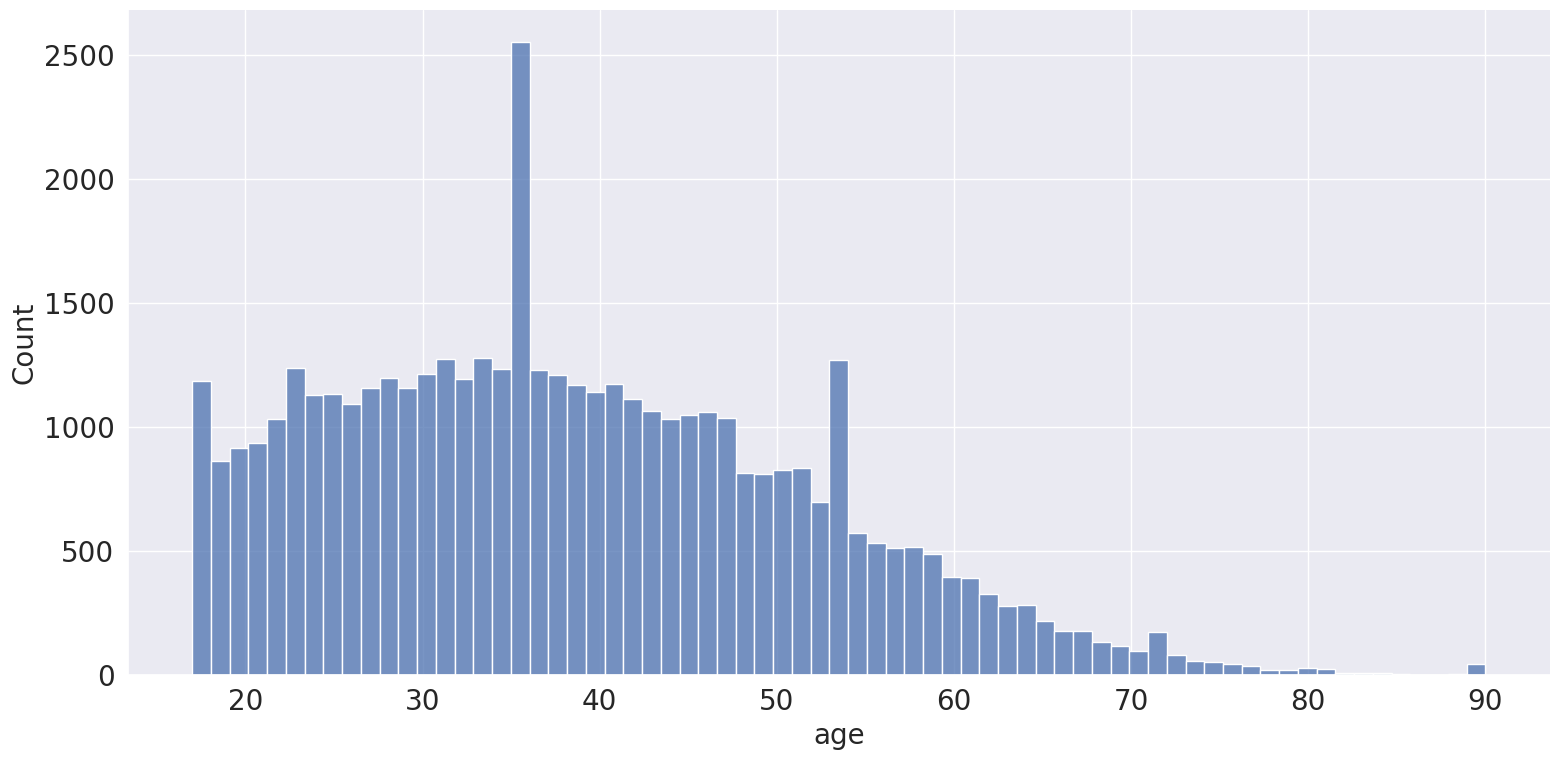

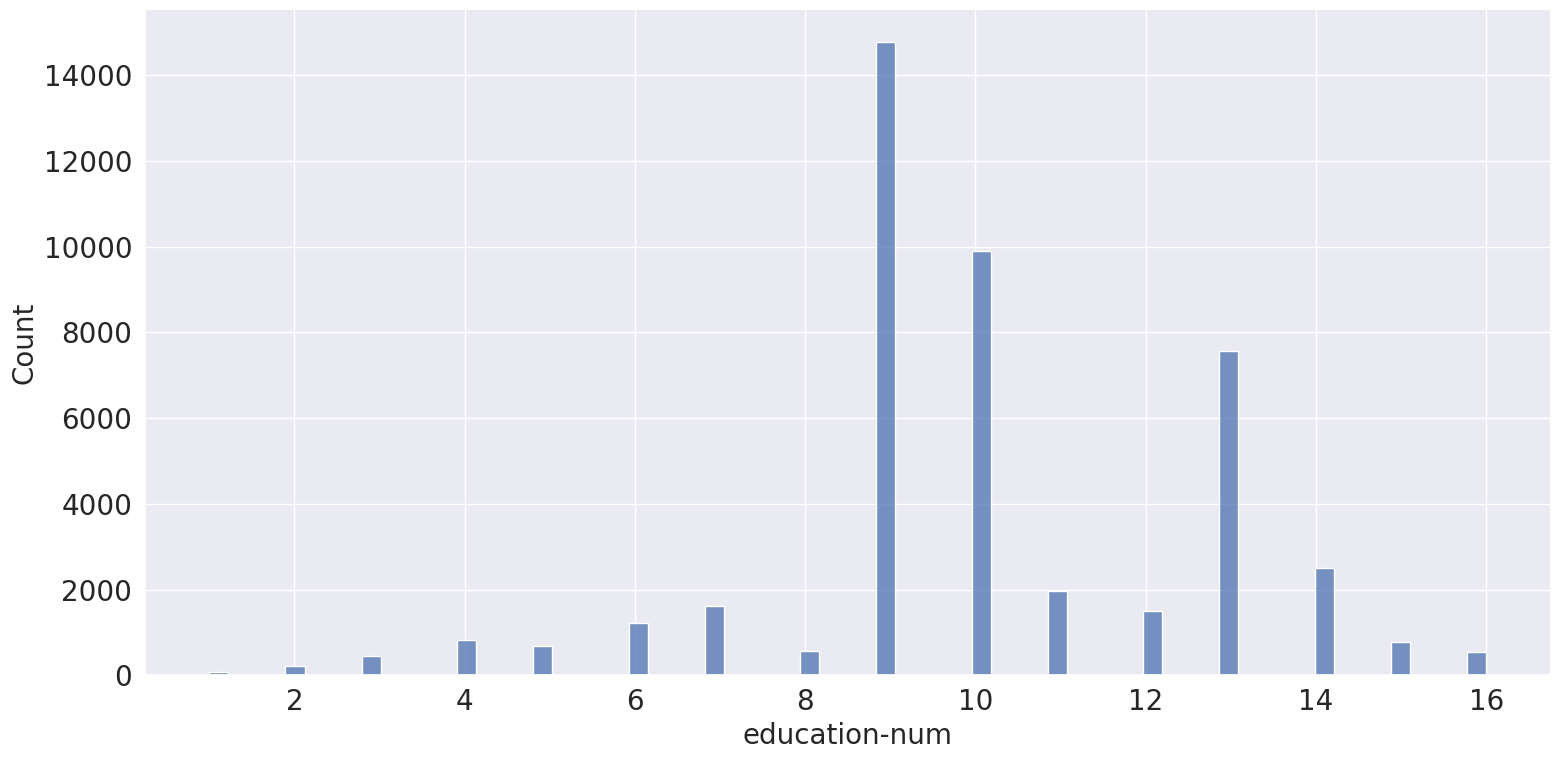

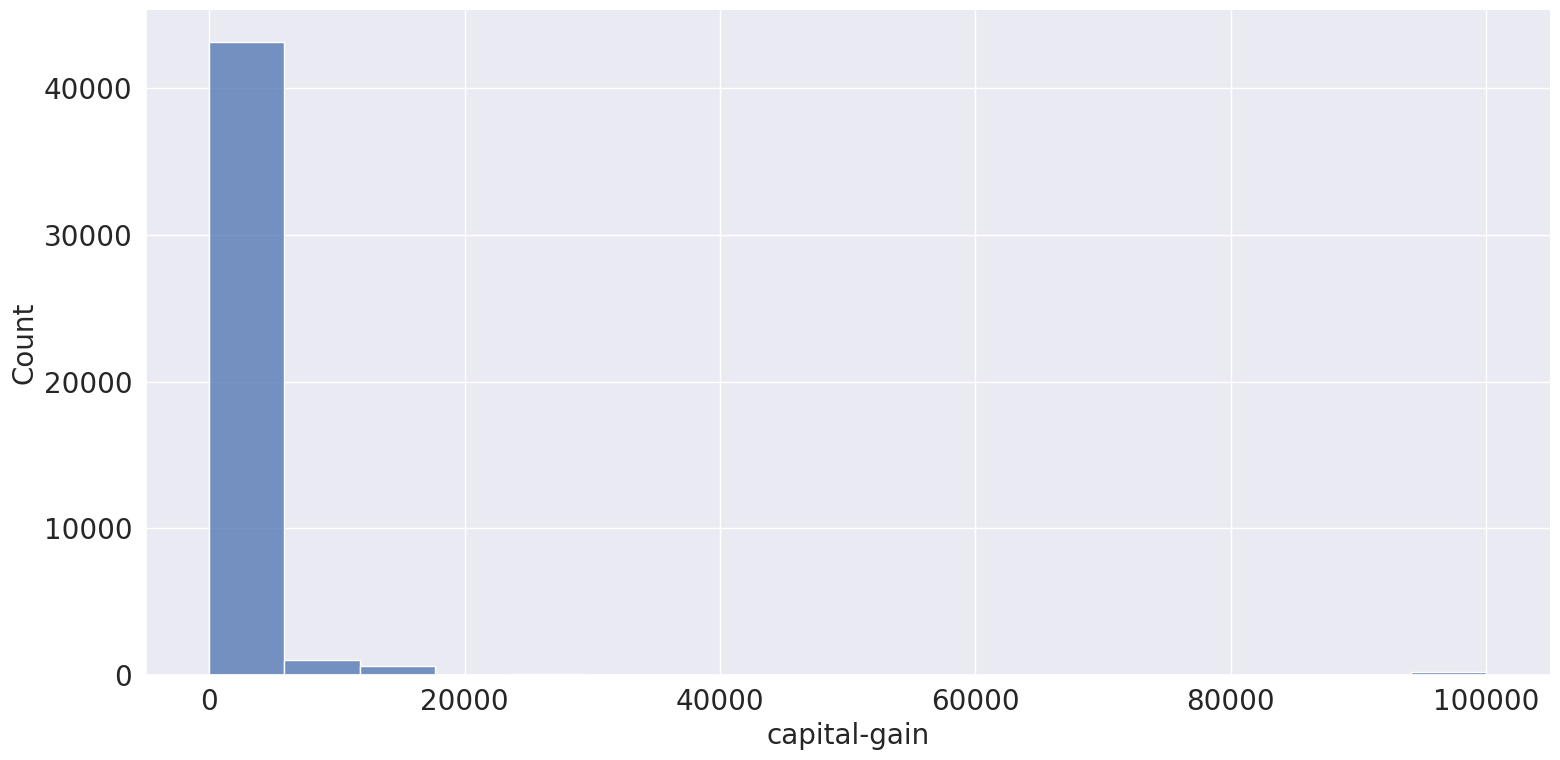

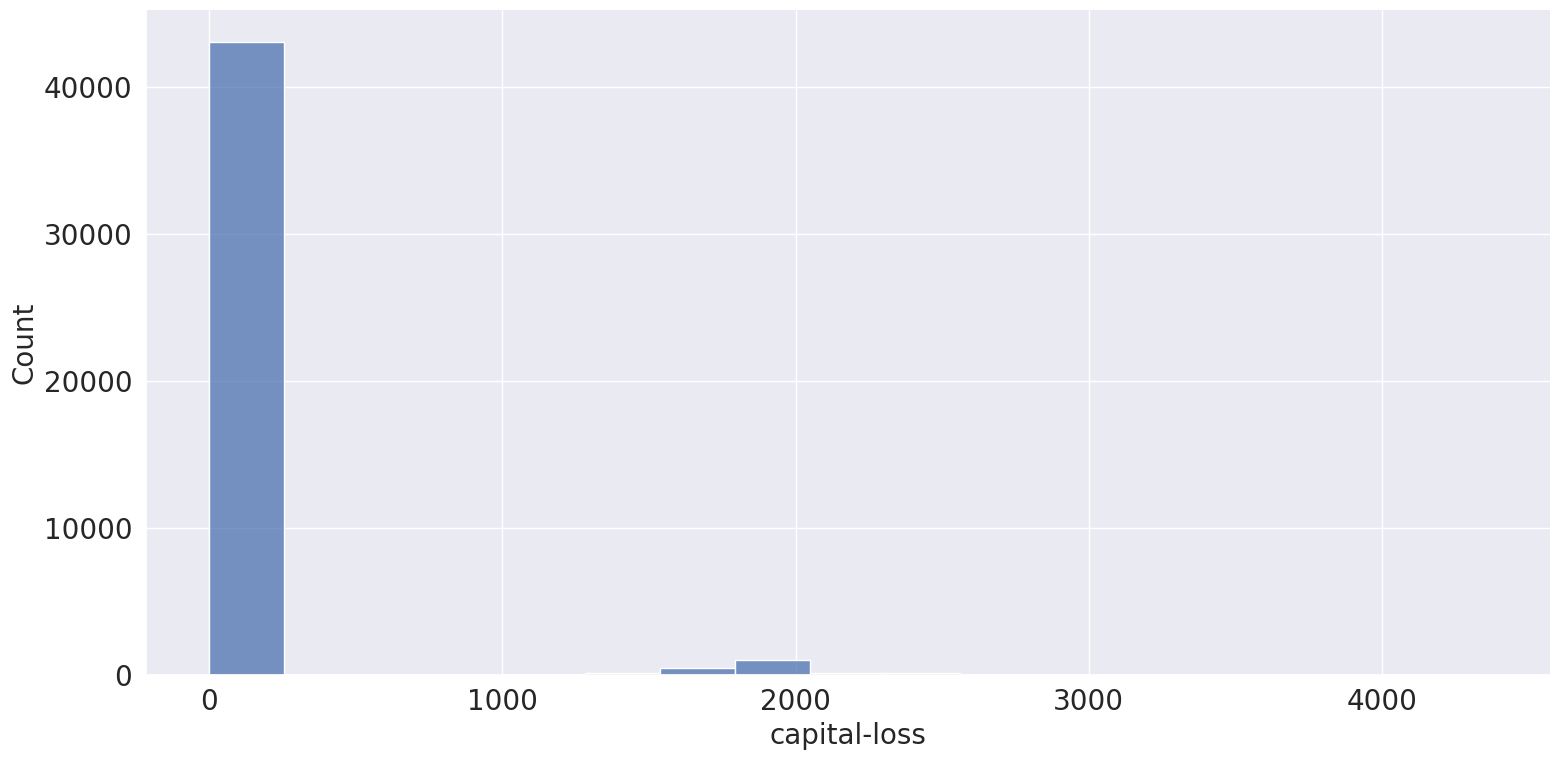

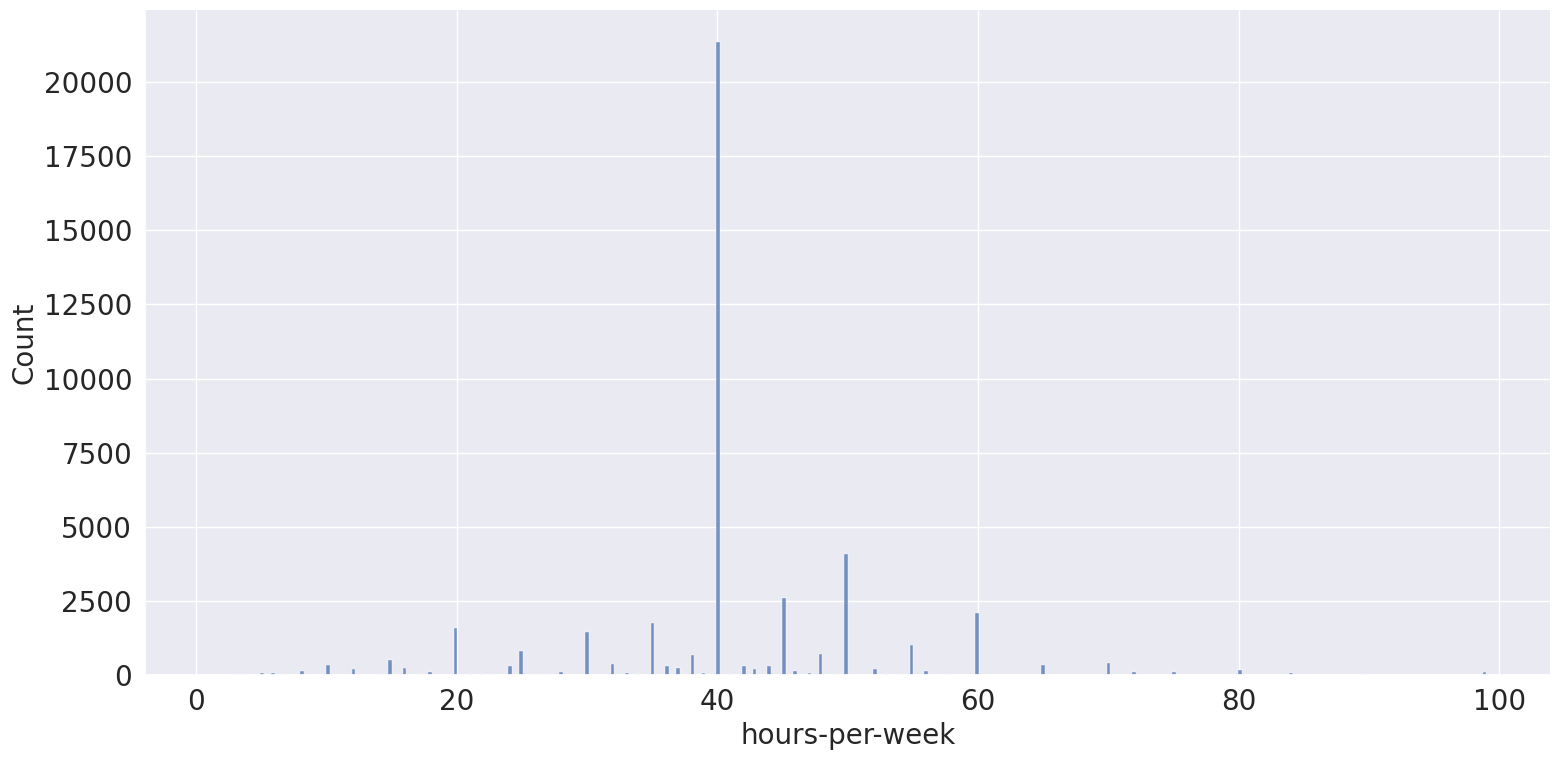

In [175]:
# importing seaborn for visualisations
import seaborn as sns

# check the distributions of continuous features
for col in continuous:
    a = sns.FacetGrid(df, height=8, aspect=2)
    a.map(sns.histplot, col, kde_kws={'bw': 25})
    a.add_legend
    print('{} skew: {}'.format(col, df[col].skew()))

From the above skew and graphs, we can see that 'capital-loss' and 'capital-gain' features are highly skewed and so let us try to apply log transformation for these two variables such that they do not negatively affect the classification results.

#### Log-transform highly skewed features

In [176]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = df)
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

In [177]:
# checking the skew after applying log transformation
for col in skewed:
    print('{} skew: {}'.format(col, features_log_transformed[col].skew()))

capital-gain skew: 3.0823859202151755
capital-loss skew: 4.271194769830899


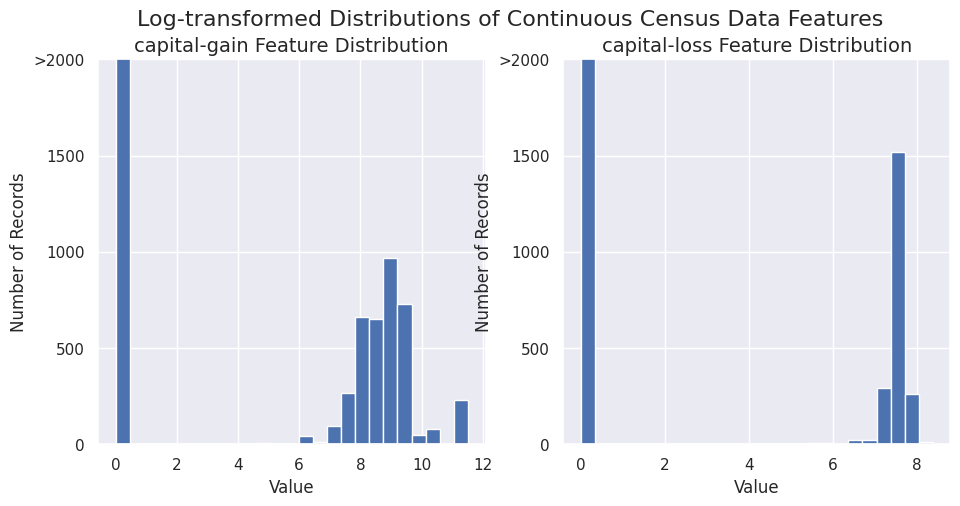

In [178]:
# Displaying the distributions after log-transform
sns.set()
fig = plt.figure(figsize=(11,5))
fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", fontsize=16)

for i, feature in enumerate(skewed):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(features_log_transformed[feature], bins=25)
    ax.set_title("{} Feature Distribution".format(feature), fontsize=14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")
    ax.set_ylim((0,2000))
    ax.set_yticks([0, 500, 1000, 1500, 2000])
    ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

#### Splitting train and validation data

In [179]:
# Separating the training data
data_train = df.iloc[:data_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[data_train.shape[0]:data_train.shape[0] + data_val.shape[0], :]

In [180]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,36177,14


In [181]:
# Print the dimension of data_val
pd.DataFrame([[data_val.shape[0], data_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,9045,14


#### imputing the null values

In [182]:
print(f'Continuous data columns: {continuous}')
print("----")
print(f'Skewed data columns: {skewed}')
print("----")
print(f'Categorical data columns: {categorical}')
print("----")
cat_nottarget = [item for item in categorical if item != target]
print(f'Categorical without target data columns: {cat_nottarget}')
print("----")
cont_notskewed = list(set(continuous) - set(skewed))
print(f'Continuous but not skewed data columns: {cont_notskewed}')


Continuous data columns: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
----
Skewed data columns: ['capital-gain', 'capital-loss']
----
Categorical data columns: ['native-country', 'education_level', 'occupation', 'workclass', 'marital-status', 'relationship', 'race', 'sex', 'income']
----
Categorical without target data columns: ['native-country', 'education_level', 'occupation', 'workclass', 'marital-status', 'relationship', 'race', 'sex']
----
Continuous but not skewed data columns: ['education-num', 'hours-per-week', 'age']


In [183]:
from sklearn.impute import SimpleImputer

# for imputing missing values with mean for continuous features except skewed data columns
mean_imputer = SimpleImputer(strategy='mean')

# for imputing missing values with median for skewed features
median_imputer = SimpleImputer(strategy='median')

# for imputing missing values with mode for categorical features
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

data_test[cont_notskewed] = mean_imputer.fit_transform(data_test[cont_notskewed])
data_test[skewed] = median_imputer.fit_transform(data_test[skewed])
data_test[cat_nottarget] = most_frequent_imputer.fit_transform(data_test[cat_nottarget])

## Scaling the data

### Standardization

Let us now standardize the numerical variables using Min Max Scaler

In [184]:
# Importing Min Max Scaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

# Standardize the training data
data_train[continuous] = scaler.fit_transform(data_train[continuous])

# Standardize the validation data
data_val[continuous] = scaler.fit_transform(data_val[continuous])

# Standardize the test data
data_test[continuous] = scaler.fit_transform(data_test[continuous])

## Encoding the data

### Combining the training, validation and test data

In [185]:
# Combine data_train, data_val and data_test
df = pd.concat([data_train, data_val, data_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,object


### Identifying categorical variables

Since we already found this in above step, just printing the categorical variables here.

In [186]:
# categorical variables are already identified in above step
df_cat

,var,nunique
0,native-country,41
1,education_level,16
2,occupation,14
3,workclass,7
4,marital-status,7
5,relationship,6
6,race,5
7,sex,2
8,income,2


### Encoding categorical features
The code below shows how to encode categorical features in the combined data.

In [187]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns= cat_nottarget)
# Print the first 5 rows of df
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.205479,0.800000,0.0,0.0,0.397959,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0.383562,0.733333,0.0,0.0,0.663265,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,0.383562,0.400000,0.0,0.0,0.500000,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,0.301370,0.533333,0.0,0.0,0.704082,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,0.465753,0.533333,0.0,0.0,0.377551,<=50K,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


### Encoding categorical target


We would like to encode the categorical target with "0" for income less than or equal to 50k and "1" for income more than 50k

In [188]:
df['income'] = df['income'].map({"<=50K":0, ">50K":1})

In [189]:
df['income'].unique()

array([ 0.,  1., nan])

The target is successfully endoded now, the nulls are expected due to missing income values in test data

### Separating the training, validation and test data
Let us now separate the training, validation and test data.

In [190]:
# Separating the training data
data_train = df.iloc[:data_train.shape[0], :]

# Separating the validation data
data_val = df.iloc[data_train.shape[0]:data_train.shape[0] + data_val.shape[0], :]

# Separating the test data
data_test = df.iloc[data_train.shape[0] + data_val.shape[0]:, :]

In [191]:
# Print the dimension of data_train
pd.DataFrame([[data_train.shape[0], data_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,36177,104


In [192]:
# Print the dimension of data_val
pd.DataFrame([[data_val.shape[0], data_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,9045,104


In [193]:
# Print the dimension of data_test
pd.DataFrame([[data_test.shape[0], data_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,45222,104


## Splitting the feature and target
The code below shows how to split the feature and target.

In [194]:
# Get the feature matrix
X_train = data_train[np.setdiff1d(data_train.columns, [target])].values
X_val = data_val[np.setdiff1d(data_val.columns, [target])].values
X_test = data_test[np.setdiff1d(data_test.columns, [target])].values

# Get the target vector
y_train = data_train[target].values
y_val = data_val[target].values
y_test = data_test[target].values

In [195]:
data_test['income'].unique()

array([nan])

## Class Imabalance ?? - To do?

In [196]:
pd.Series(y_train).value_counts()

,count
0.0,27269
1.0,8908


Class 0 and 1 are in 3:1 ratio, we should look into some class balancing methods if required like Random Oversampling or SMOTE

# Hyperparameter Tuning

## Creating the dictionary of the models

In [197]:
# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

models = {'gnbc' : GaussianNB(),
          'knbc' : KNeighborsClassifier(),
          'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'dtc' : DecisionTreeClassifier(class_weight='balanced', random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'gbc' : GradientBoostingClassifier(random_state = random_seed),
          'abc' : AdaBoostClassifier(random_state = random_seed, learning_rate=0.5, n_estimators=4000)
          }

## Creating the dictionary of the pipelines

In [198]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Getting the predefined split cross-validator

In [199]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb

## utilising function defined in class for predefined split cross-validator

from sklearn.model_selection import PredefinedSplit

def get_train_val_ps(X_train, y_train, X_val, y_val):
    """
    Get the:
    feature matrix and target velctor in the combined training and validation data
    target vector in the combined training and validation data
    PredefinedSplit

    Parameters
    ----------
    X_train : the feature matrix in the training data
    y_train : the target vector in the training data
    X_val : the feature matrix in the validation data
    y_val : the target vector in the validation data

    Return
    ----------
    The feature matrix in the combined training and validation data
    The target vector in the combined training and validation data
    PredefinedSplit
    """

    # Combine the feature matrix in the training and validation data
    X_train_val = np.vstack((X_train, X_val))

    # Combine the target vector in the training and validation data
    y_train_val = np.vstack((y_train.reshape(-1, 1), y_val.reshape(-1, 1))).reshape(-1)

    # Get the indices of training and validation data
    train_val_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_val.shape[0], 0))

    # The PredefinedSplit
    ps = PredefinedSplit(train_val_idxs)

    return X_train_val, y_train_val, ps


# calling the function for obtaining predefined split cross validator
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

## GridSearchCV

### Creating the dictionary of the parameter grids
- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [200]:
param_grids = {}

#### The parameter grid for Gaussian Naive Bayes

In [201]:
# The parameter grid of var_smoothing
var_smoothing_gnbc = np.logspace(-12, -6, num=7)

# Update param_grids
param_grids['gnbc'] = [{'model__var_smoothing' : var_smoothing_gnbc}]

#### The parameter grid for KNeighbors Classification

In [202]:
n_neighbors_knbc = [10, 20, 30]
weights_knbc = ['uniform', 'distance']
metric_knbc = ['euclidean', 'manhattan']

param_grids['knbc'] = [{'model__n_neighbors': n_neighbors_knbc,
                        'model__weights': weights_knbc,
                        'model__metric': metric_knbc}]

#### The parameter grid for LogisticRegression
- The hyperparameters we want to fine-tune are:
    - tol
    - C
- See details of the meaning of the hyperparametes in [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [203]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]  ## using values mentioned in class here, change as per kaggle?

# The parameter grid of C
C_grid = [0.1, 1, 10] ## using values mentioned in class, change as per kaggle?

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

#### The parameter grid for Decision Tree Classifier
- The hyperparameters we want to fine-tune are:
  - min_samples_split
  - min_samples_leaf

In [204]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]  ## should check with different splits here

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100] ##  should check for diff values here as well

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for Random Forest
- The hyperparameters we want to fine-tune are:
    - min_samples_split
    - min_samples_leaf

- See details of the meaning of the hyperparametes in [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [205]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]  ## different parameters are finetuned in kaggle for this (n_estimators, max_depth), should change?

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for Gradient Boosting
- The hyperparameters we want to fine-tune are:
    - n_estimators
    - learning_rate
    - min_samples_split
    - min_samples_leaf
    - max depth
    - subsample


In [206]:
n_estimators_gbc = list(range(20,101,20))
learning_rate_gbc = [0.2]
min_samples_split_gbc = [500]
min_samples_leaf_gbc = [50]
max_depth_gbc = [8]
subsample_gbc = [0.8]

param_grids['gbc'] = [{'model__n_estimators': n_estimators_gbc,
                       'model__learning_rate': learning_rate_gbc,
                       'model__min_samples_split': min_samples_split_gbc,
                       'model__min_samples_leaf' : min_samples_leaf_gbc,
                       'model__max_depth' : max_depth_gbc,
                       'model__subsample' : subsample_gbc}]

#### The parameter grid for Adaboost Classifier
- The hyperparameters we want to fine-tune are:
    - n_estimators


In [207]:
n_estimators_abc = list(range(1000,1501,100))

param_grids['abc'] = [{ 'model__n_estimators': n_estimators_abc}]

### Tuning the hyperparameters
The code below shows how to fine-tune the hyperparameters of SGDRegressor and LinearRegression_MBGD using sklearn GridSearchCV.

In [208]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    print(cv_results)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
results = pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

   rank_test_score  mean_test_score  std_test_score  mean_train_score  \
6                1         0.647918             0.0          0.637177   
5                2         0.642795             0.0          0.630785   
4                3         0.634789             0.0          0.624228   
3                4         0.627703             0.0          0.618466   
2                5         0.623973             0.0          0.613738   
1                6         0.619126             0.0          0.610720   
0                7         0.616548             0.0          0.607055   

   std_train_score  mean_fit_time  std_fit_time  mean_score_time  \
6              0.0       0.438428           0.0         0.097412   
5              0.0       0.485711           0.0         0.106532   
4              0.0       0.613922           0.0         0.103743   
3              0.0       0.517885           0.0         0.108453   
2              0.0       0.470550           0.0         0.145579   
1      

# Model Selection
Here we will select best_estimator_gs as the best model. Later we will use this best model to generate the submission file for this kaggle competition.

In [209]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]